In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Using Naive Bayes' for Numerical Data

In [2]:
data = pd.read_csv('Iris.csv')  #getting the data
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [4]:
data.shape

(150, 6)

In [5]:
data['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
#storing the data separately according to their species
data_setosa=data[data['Species']=='Iris-setosa']
data_versicolor=data[data['Species']=='Iris-versicolor']
data_virginica=data[data['Species']=='Iris-virginica']

In [7]:
#we are checking the sepal length for the 3 different species

SepalLength_setosa = data_setosa['SepalLengthCm'].skew()
SepalLength_versicolor = data_versicolor['SepalLengthCm'].skew()
SepalLength_virginica = data_virginica['SepalLengthCm'].skew()

print ("Sepal Lengths \n")
print("Iris-setosa = ",SepalLength_setosa)
print("Iris-versicolor = ",SepalLength_versicolor)
print("Iris-virginica = ",SepalLength_virginica)

Sepal Lengths 

Iris-setosa =  0.12008698599540611
Iris-versicolor =  0.10537761729396025
Iris-virginica =  0.11801511964927214


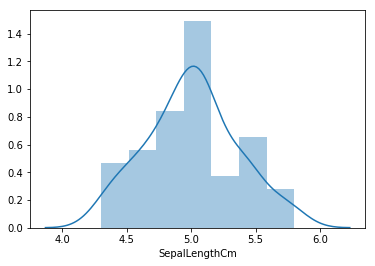

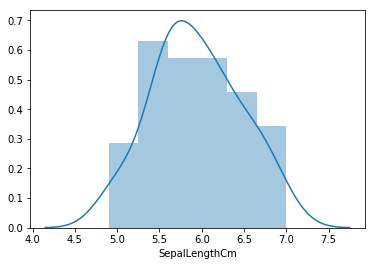

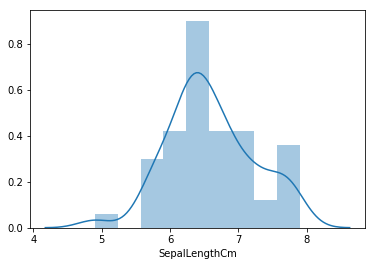

In [8]:
#checking the type of distribution for sepal length for 3 different species

plt.subplots(1,1)
sns.distplot(data_setosa['SepalLengthCm'])

plt.subplots(1,1)
sns.distplot(data_versicolor['SepalLengthCm'])

plt.subplots(1,1)
sns.distplot(data_virginica['SepalLengthCm'])

In [9]:
#checking the sepal width for 3 different species

SepalWidth_setosa = data_setosa['SepalWidthCm'].skew()
SepalWidth_versicolor = data_versicolor['SepalWidthCm'].skew()
SepalWidth_virginica = data_virginica['SepalWidthCm'].skew()

print ("Sepal Width \n")
print("Iris-setosa = ",SepalWidth_setosa)
print("Iris-versicolor = ",SepalWidth_versicolor)
print("Iris-virginica = ",SepalWidth_virginica)

Sepal Width 

Iris-setosa =  0.10705281040086667
Iris-versicolor =  -0.36284484378726206
Iris-virginica =  0.36594907446699937


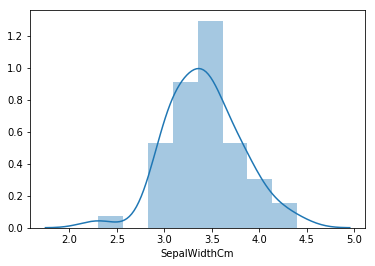

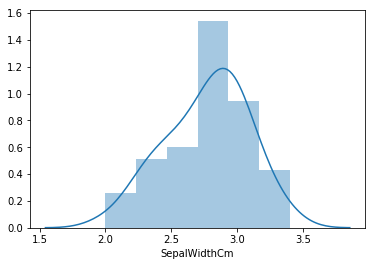

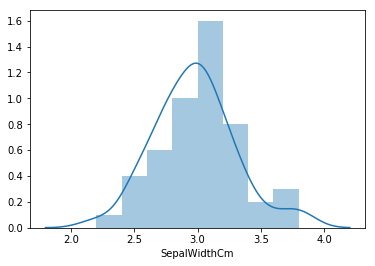

In [10]:
#checking the type of distribution for sepal width for 3 different species

plt.subplots(1,1)
sns.distplot(data_setosa['SepalWidthCm'])

plt.subplots(1,1)
sns.distplot(data_versicolor['SepalWidthCm'])

plt.subplots(1,1)
sns.distplot(data_virginica['SepalWidthCm'])

In [11]:
#checking the petal length for 3 different species

PetalLength_setosa = data_setosa['PetalLengthCm'].skew()
PetalLength_versicolor = data_versicolor['PetalLengthCm'].skew()
PetalLength_virginica = data_virginica['PetalLengthCm'].skew()

print ("Petal length \n")
print("Iris-setosa = ",PetalLength_setosa)
print("Iris-versicolor = ",PetalLength_versicolor)
print("Iris-virginica = ",PetalLength_virginica)

Petal length 

Iris-setosa =  0.07184613560973103
Iris-versicolor =  -0.6065076894906241
Iris-virginica =  0.5494445890270053


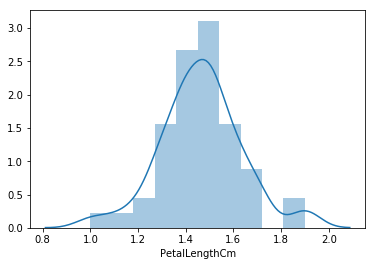

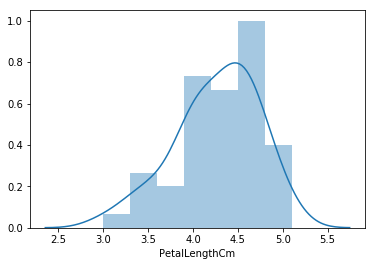

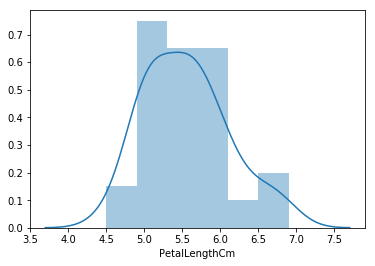

In [12]:
#seeing the distribution for petal length for 3 different species

plt.subplots(1,1)
sns.distplot(data_setosa['PetalLengthCm'])

plt.subplots(1,1)
sns.distplot(data_versicolor['PetalLengthCm'])

plt.subplots(1,1)
sns.distplot(data_virginica['PetalLengthCm'])

In [13]:
#checking the petal width for 3 different species

PetalWidth_setosa = data_setosa['PetalWidthCm'].skew()
PetalWidth_versicolor = data_versicolor['PetalWidthCm'].skew()
PetalWidth_virginica = data_virginica['PetalWidthCm'].skew()

print ("Petal width \n")
print("Iris-setosa = ",PetalWidth_setosa)
print("Iris-versicolor = ",PetalWidth_versicolor)
print("Iris-virginica = ",PetalWidth_virginica)

Petal width 

Iris-setosa =  1.1972429698312048
Iris-versicolor =  -0.031179598052247178
Iris-virginica =  -0.12947693089709877


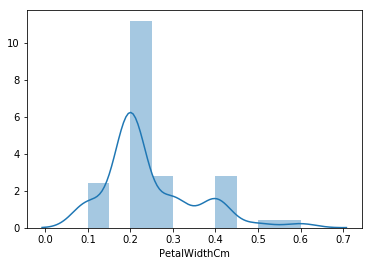

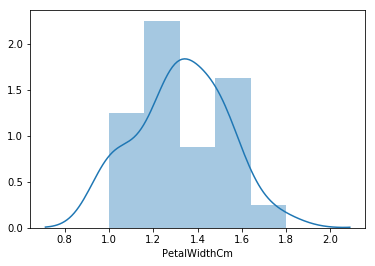

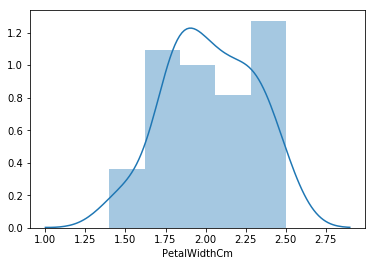

In [14]:
#seeing the distribution fro petal width for the 3 different species

plt.subplots(1,1)
sns.distplot(data_setosa['PetalWidthCm'])

plt.subplots(1,1)
sns.distplot(data_versicolor['PetalWidthCm'])

plt.subplots(1,1)
sns.distplot(data_virginica['PetalWidthCm'])

In [15]:
from math import pi, e, sqrt #importing necessary packages

# Gaussian Naive Bayes formula for this dataset cause data is normally distributed

# Formula used : f(x) = (1/(sd * sqrt(2 * pi))) * pow(e, ((-1/2) * pow(((x-m)/sd), 2)))

# sd = standard deviation  ;  m = mean ; f(x) = probability for the point x

In [16]:
def calculate_probability(series, x) : # series = particular column of the dataset where the point x lies
    
    m=series.mean()
    sd=series.std()
    
    probability =  (1/(sd * sqrt(2 * pi))) * pow(e, ((-1/2) * pow(((x-m)/sd), 2)))
    
    return probability

In [17]:
def find_probability(df) : #df is the dataset of a particular species
    
    probability = df.shape[0] / data.shape[0]
    
    for i in criteria :
        
        probability *= calculate_probability(df[i], criteria[i])
        
    return probability

In [18]:
criteria={}  #created a dictionary for storing input values for sepal length, sepal width, petal length, petal width

In [19]:
print('Enter Sepal Length')
criteria['SepalLengthCm']=float(input())

Enter Sepal Length
4.7


In [20]:
print('Enter Sepal Width')
criteria['SepalWidthCm']=float(input())

Enter Sepal Width
3.7


In [21]:
print('Enter Petal Length')
criteria['PetalLengthCm']=float(input())

Enter Petal Length
2.0


In [22]:
print('Enter Petal Width')
criteria['PetalWidthCm']=float(input())

Enter Petal Width
0.3


In [23]:
criteria

{'SepalLengthCm': 4.7,
 'SepalWidthCm': 3.7,
 'PetalLengthCm': 2.0,
 'PetalWidthCm': 0.3}

In [24]:
p_setosa = find_probability(data_setosa)
p_versicolor = find_probability(data_versicolor)
p_virginica = find_probability(data_virginica)

print("SETOSA :", p_setosa)
print("VERSICOLOR :", p_versicolor)
print("VIRGINICA :", p_virginica)

SETOSA : 0.013026689015295956
VERSICOLOR : 5.352293900202352e-15
VIRGINICA : 7.057685074001427e-22


In [25]:
max(p_setosa,p_versicolor,p_virginica) #whosever probability will be the highest, that will be the species

0.013026689015295956

# So the given inputs was for Iris Setosa